In [7]:
import pandas as pd
retail_df = pd.read_excel('data/Online Retail.xlsx')
retail_df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom


In [15]:
result = retail_df.groupby('CustomerID').agg(
    recentdate=('InvoiceDate','max'),
    totalprice=('UnitPrice','sum'),
    count=('UnitPrice','count')
)

len(result)

result.head()

,recentdate,totalprice,count
CustomerID,,,
12346.0,2011-01-18 10:17:00,2.08,2
12347.0,2011-12-07 15:52:00,481.21,182
12348.0,2011-09-25 13:13:00,178.71,31
12349.0,2011-11-21 09:51:00,605.10,73
12350.0,2011-02-02 16:01:00,65.30,17


In [25]:
result['recency_score'] = pd.qcut(result['recentdate'], 5, labels=[1, 2, 3, 4, 5])
result['frequency_score'] = pd.qcut(result['count'], 5, labels=[1, 2, 3, 4, 5])
result['monetary_score'] = pd.qcut(result['totalprice'], 5, labels=[1, 2, 3, 4, 5])
result.head()


,recentdate,totalprice,count,recency_score,frequency_score,monetary_score
CustomerID,,,,,,
12346.0,2011-01-18 10:17:00,2.08,2,1,1,1
12347.0,2011-12-07 15:52:00,481.21,182,5,5,5
12348.0,2011-09-25 13:13:00,178.71,31,2,3,3
12349.0,2011-11-21 09:51:00,605.10,73,4,4,5
12350.0,2011-02-02 16:01:00,65.30,17,1,2,2


In [32]:
from sklearn.cluster import KMeans

import matplotlib.pyplot as plt

In [42]:
kmeans = KMeans(n_clusters=10)
result['Cluster'] = kmeans.fit_predict(result[['recency_score', 'frequency_score', 'monetary_score']])
result

,recentdate,totalprice,count,recency_score,frequency_score,monetary_score,Cluster
CustomerID,,,,,,,
12346.0,4985,2.08,2,1,1,1,3
12347.0,4662,481.21,182,5,5,5,1
12348.0,4735,178.71,31,2,3,3,6
12349.0,4678,605.10,73,4,4,5,1
12350.0,4970,65.30,17,1,2,2,3
...,...,...,...,...,...,...,...
18280.0,4937,47.65,10,1,1,2,3
18281.0,4840,39.36,7,1,1,1,3
18282.0,4667,62.68,13,5,1,2,2


In [44]:
from sklearn.metrics import silhouette_score
silhouette_score(result, kmeans.labels_)

np.float64(0.008354001798851362)

In [46]:
scaled_data = result[['recency_score', 'frequency_score', 'monetary_score']]

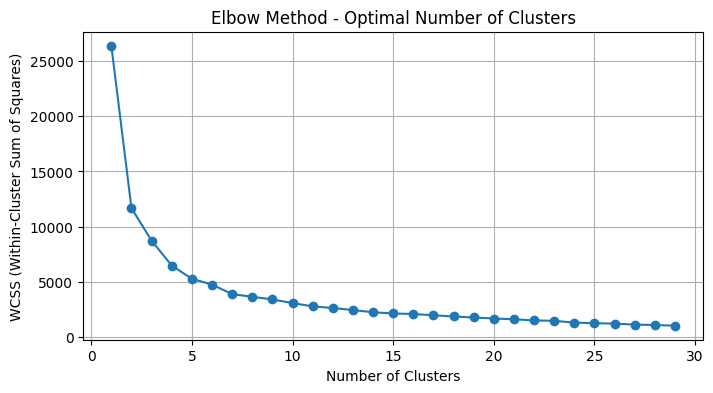

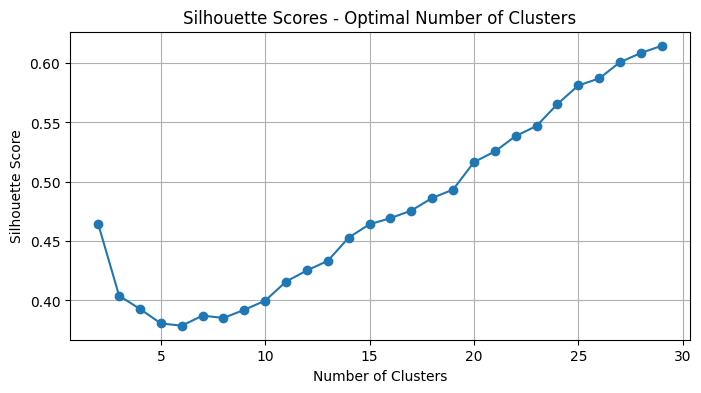

In [51]:
# 1. 엘보우 방법을 이용한 적절한 군집 수 찾기
wcss = []
for k in range(1, 30):
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(scaled_data)
    wcss.append(kmeans.inertia_)  # WCSS 값을 계산하여 리스트에 추가

# WCSS 값을 시각화
plt.figure(figsize=(8, 4))
plt.plot(range(1, 30), wcss, marker='o')
plt.title('Elbow Method - Optimal Number of Clusters')
plt.xlabel('Number of Clusters')
plt.ylabel('WCSS (Within-Cluster Sum of Squares)')
plt.grid(True)
plt.show()

# 2. 실루엣 점수를 이용한 적절한 군집 수 찾기
silhouette_scores = []
for k in range(2, 30):
    kmeans = KMeans(n_clusters=k, random_state=42)
    labels = kmeans.fit_predict(scaled_data)
    silhouette_scores.append(silhouette_score(scaled_data, labels))

# 실루엣 점수를 시각화
plt.figure(figsize=(8, 4))
plt.plot(range(2, 30), silhouette_scores, marker='o')
plt.title('Silhouette Scores - Optimal Number of Clusters')
plt.xlabel('Number of Clusters')
plt.ylabel('Silhouette Score')
plt.grid(True)
plt.show()